In [1]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## Part 1: Prepare the data

In [2]:
# Read myopia.csv into a Pandas DataFrame
df = pd.read_csv(Path('Data/Myopia.csv'))
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Remove the "MYOPIC" column from the dataset
# features
df_features = df.drop('MYOPIC', axis=1)
df_features.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# target
target = df['MYOPIC']

In [5]:
# Standardizes the dataset using a scaler
# Create a scaler to standardize the data
scaler = StandardScaler()
# Train the scaler with the data.
X_scaled = scaler.fit_transform(df_features)
X_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

## Part 2: Apply dimensionality reduction

In [6]:
# Perform dimensionality reduction with PCA
 # Initialize PCA model preserving 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.9)

# Get the principal components for the X_train_scaled
feature_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915189

In [10]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results
#Initialize the t-SNE model
tsne = TSNE(learning_rate=250, n_components=3, perplexity=50, verbose=1, n_iter=2500)
#Reduce dimensions
tsne_features = tsne.fit_transform(feature_pca)

C:\Users\Qianna\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.001s...
[t-SNE] Computed neighbors for 618 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.438866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.599480
[t-SNE] KL divergence after 2500 iterations: 2.065474


In [11]:
# Get the shape of features after reduction
tsne_features.shape

(618, 3)

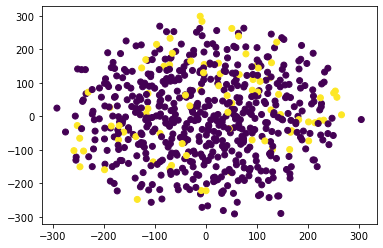

In [13]:
# Create a scatter plot of the t-SNE output
plt.scatter(x = tsne_features[:,0], y = tsne_features[:,1], c = df['MYOPIC'])
plt.show()

* No cluster

## Part 3: Perform a cluster analysis with K-means

In [19]:
# create dataframe with 3 principal components
df_pca = pd.DataFrame(tsne_features, columns=["pc_1", "pc_2", "pc_3"])
df_pca.head()

,pc_1,pc_2,pc_3
0,-103.163208,-135.955734,239.625397
1,126.700966,-75.535980,-92.299301
2,-89.512123,-135.400146,15.831442
3,253.436661,75.466461,84.232620
4,-107.046295,-256.589386,18.863811


In [14]:
# Create an elbow plot to identify the best number of clusters
# Use a for loop to determine the inertia for each k between 1 through 10
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(feature_pca)
    inertia.append(km.inertia_)

# If possible, determine where the elbow of the plot is, and at which value of k it appears
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\Qianna\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


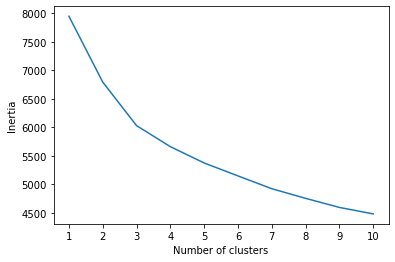

In [20]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### The elbow of the plot seems to be 3 or 4

In [27]:
# Predicting clusters
# Using k = 4
model = KMeans(n_clusters=4, random_state=42)

# Train the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)

# Add predicted clusters (labels) to DataFrame
pca_df['class'] = model.labels_

C:\Users\Qianna\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\Qianna\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


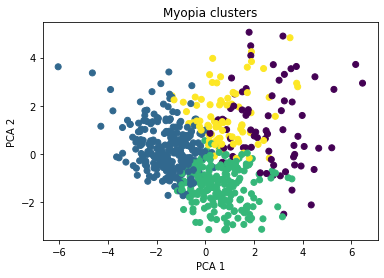

In [28]:
# Plot the Clusters
plt.scatter(x=pca_df[1], y=pca_df[2], c=pca_df['class'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Myopia clusters')
plt.show()

## Part 4: Make a recommendation

* Patients can be grouped into four clusters.